<a href="https://colab.research.google.com/github/RyutoYoda/heart-failure-predict/blob/main/heart_failure_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os 
os.chdir('/content/drive/MyDrive/Colab Notebooks/heartstop') 

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.head()

In [10]:
columns = train.columns
print(columns)

Index(['id', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'target'],
      dtype='object')


In [30]:
x = train[[ 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', ]]
y = train['target']

In [31]:
x = pd.get_dummies(x, columns=['sex'])

In [32]:
x['age'].fillna(x['age'].mean(), inplace=True)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)

In [35]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [36]:
y_pred = rf.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       162
           1       0.80      0.42      0.55        38

    accuracy                           0.87       200
   macro avg       0.84      0.70      0.74       200
weighted avg       0.86      0.87      0.85       200

Accuracy: 0.87


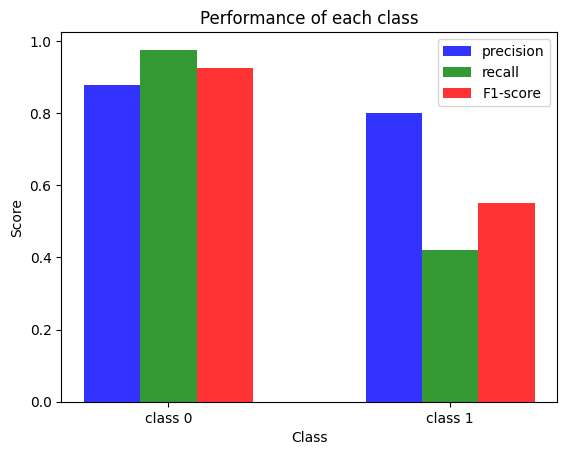

In [38]:
# classification_reportを計算する
target_names = ['class 0', 'class 1']
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# 精度、再現率、F1値の値を取り出す
precision = [report[k]['precision'] for k in target_names]
recall = [report[k]['recall'] for k in target_names]
f1_score = [report[k]['f1-score'] for k in target_names]

# グラフ
fig, ax = plt.subplots()
index = np.arange(len(target_names))
bar_width = 0.2
opacity = 0.8

rects1 = ax.bar(index, precision, bar_width,
                alpha=opacity, color='b', label='precision')

rects2 = ax.bar(index + bar_width, recall, bar_width,
                alpha=opacity, color='g', label='recall')

rects3 = ax.bar(index + bar_width * 2, f1_score, bar_width,
                alpha=opacity, color='r', label='F1-score')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Performance of each class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(target_names)
ax.legend()

plt.show()


In [68]:
x_for_submit = test[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',]]
x_for_submit = pd.get_dummies(x_for_submit, columns=['sex'])
x_for_submit['age'].fillna(x_for_submit['age'].mean(), inplace=True)
predictions = rf.predict(x_for_submit)

In [72]:
submit = pd.DataFrame({'id': test['id'], 'terget': predictions})
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/heartstop/submit.csv', index=False, header=False)